In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


1. **라이브러리 및 데이터 불러오기
 - **라이브러리 버전 확인 반드시 해준다!!**
2. 탐색적 자료 분석 (EDA)
 - **데이터 시각화**
 - **산점도, 막대그래프 등**
 - 그래프 해석해서 설명 달기
 - 약간의 데이터 전처리
3. 데이터 전처리
 - Feature Engineering
 - ML 모형을 돌리기 위해 표준화 등/ 원핫-인코딩
 - 파생변수(도출변수) 만들기
  + 왜 이변수를 만들었는지에 대한 설명 필요
4. 머신러닝 모형 개발
 - 모형(로지스틱,,등)에 대한 설명 필요
 - 모형은 1, 2개 정도만 사용하자
 - 교차 검증, 하이퍼파라미터 튜닝
5. 모형 평가
 - 훈련 데이터를 쪼개서 훈련 데이터와 검증 데이터 분리
 - 정확도 비교
 - 혼동행렬(confusion Matrix) 설명을 잘 찾아서 넣어주자
6. 제출
 - 제출 양식 샘플은 쌤이 만들어 준다.
★. 참고
 - 다른 사람의 code를 참고 했다면 노트북 표절 방지를 위해 참조한 코드는 반드시 링크 걸어둘 것
  + 저자 이름, 글 제목, 링크 주소.
★. 마감일
 - 4월 12일 17시 40분
 - 제출 형태
  + Leaderboard 랭킹 사진 캡쳐
  + 고용노동부 보고하기.

★★ 코드가 오류가 계속 날 때는 쌤이 도움이 되는 링크만 준다(실력은 늘지도,,)

#### 데이터 설명
- 우주선 타이타닉이 시공간 이상과 충돌 하는 동안에 승객이 다른 차원으로 이동했는가에 대한 여부 예측하는 것.
 + 이러한 예측을 돕기 위해 손상된 함선의 컴퓨터 시스템에서 복구된 개인 기록이 제공됩니다.

- sample_submission.csv : 올바른 형식의 송신 파일.
- train : 승객이 다른 차원으로 운송되었는지 여부. 예측하려는 대상 열입니다.(훈련데이터로 사용됨)
- test : 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. 작업은 이 세트의 승객에 대한 운송 값을 예측하는 것

- PassengerId - 테스트 세트에 포함된 각 승객의 ID
- Transported - 타겟. 각 승객에 대해 참 또는 거짓을 예측
- HomePlanet - 승객이 출발한 행성으로, 일반적으로 영구 거주지 행성
- CryoSleep - 승객이 항해가 진행되는 동안 일시 정지 애니메이션으로 전환되도록 선택했는지 여부를 나타냅니다. 저온 수면 중인 승객들은 객실에 갇히게 된다.
- 객실 - 승객이 머물고 있는 객실 번호입니다. 갑판/번호/측면 형식을 취합니다. 여기서 측면은 좌현에 P 또는 우현에 S가 될 수 있습니다.
- 목적지 - 승객이 주차를 해제할 행성입니다.
- VIP - 승객이 여행 중 특별 VIP 서비스에 비용을 지불했는지 여부
- 룸 서비스, 푸드 코트, 쇼핑 몰, 스파, VRDeck - 승객이 우주선 타이타닉의 많은 고급 편의 시설 각각에서 청구한 금액입니다.

In [2]:
import pandas as pd
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")
df = pd.read_csv("../input/spaceship-titanic/train.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

In [5]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


- 드랍을 시키는 이유는 모형에 아무런 영향을 주지 않기 때문.
- 드랍은 지정된 행이나 열을 삭제하기 때문에 행축을 지정(axis= 0 또는 1 )

In [10]:
df = df.drop(['Cabin'], axis=1)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
test = test.drop(['Cabin'], axis=1)
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [12]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


df(train)의 누락값을 na 해주고 describe 해주기

In [13]:
df.dropna().describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000
mean,28.891484,224.761236,479.760497,177.238025,317.654642,303.027055
std,14.516600,671.669743,1674.418004,572.893078,1164.620080,1125.732200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,48.000000,82.000000,29.000000,64.250000,50.250000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000


수치값의 분포도

In [14]:
df.mad()

Age              11.423771
RoomService     347.127496
FoodCourt       719.533919
ShoppingMall    272.878338
Spa             486.902759
VRDeck          481.048454
Transported       0.499974
dtype: float64

In [15]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [16]:
test.dropna().describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000
mean,28.579542,218.546238,440.907820,174.109129,295.613738,297.090395
std,14.134851,614.659868,1489.409098,564.958573,1080.348991,1160.496856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,51.000000,78.000000,29.500000,50.000000,35.500000
max,79.000000,11567.000000,20809.000000,8292.000000,15733.000000,19086.000000


In [17]:
test.mad()

Age              11.174915
RoomService     337.293629
FoodCourt       686.754710
ShoppingMall    277.442969
Spa             474.830575
VRDeck          496.591031
dtype: float64

### 결측치 확인과 제거
 - df, test

In [18]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [19]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [20]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [21]:
df.groupby('VIP').count()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
VIP,,,,,,,,,,,,
False,8291,8098,8084,8115,8119,8118,8118,8092,8112,8108,8095,8291
True,199,194,196,197,198,195,193,194,197,195,196,199


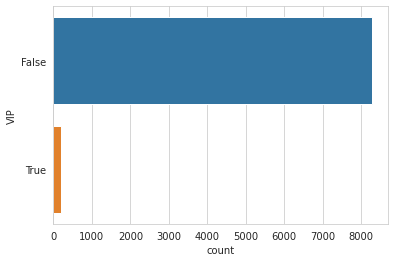

In [22]:
sns.countplot(y='VIP', data=df);

- 저온 수면을 안한 사람이 많음

In [23]:
df.groupby('CryoSleep').count()

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
CryoSleep,,,,,,,,,,,,
False,5439,5315,5309,5343,5318,5328,5329,5335,5326,5320,5311,5439
True,3037,2962,2989,2955,2962,2969,2967,2941,2972,2975,2975,3037


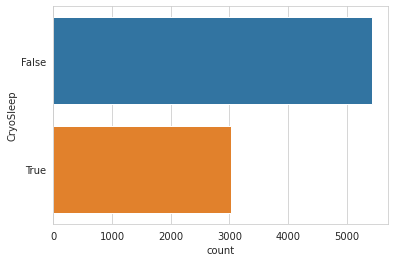

In [24]:
sns.countplot(y='CryoSleep', data=df);

Transported는 수가 비슷함.

In [25]:
df.groupby('Transported').count()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,
False,4315,4217,4204,4225,4226,4216,4217,4231,4221,4223,4225,4216
True,4378,4275,4272,4286,4288,4274,4295,4279,4264,4287,4280,4277


In [26]:
df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

# 시각화
 - Transported 와 FoodCourt 관계성
 - VIP 와 RoomService 관계성
 - 생존과 저온수면 그리고 나이 따른 그래프

- 탑승객은 약 18세 ~ 37세가 가장 많았고, VIP도 많았음을 age value counts와 그래프를 통해 알 수 있다.
- 남은 40대 이후 부터는 탑승객이 적기에 VIP의 수도 적어짐을 확인 할 수 있다. 


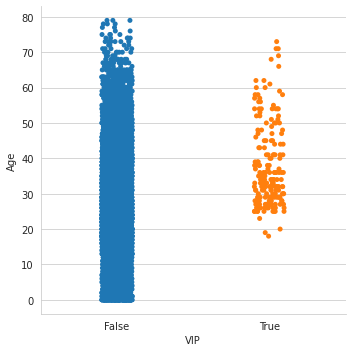

In [27]:
sns.catplot(x='VIP', y='Age', data=df)

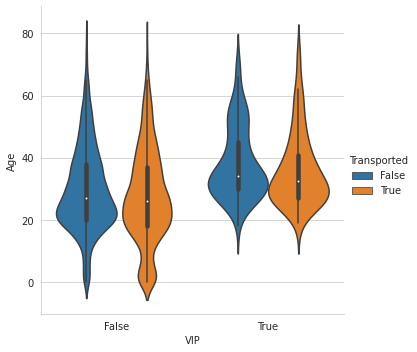

In [28]:
sns.catplot(x='VIP', y='Age', hue='Transported', data=df,
           kind='violin')

- 푸드코트를 많이 이용한 사람이 생존율이 좀 더 높았고, 룸서비스를 많이 이용할 수록 생존율이 떨어지는 것을 확인 할 수 있다.

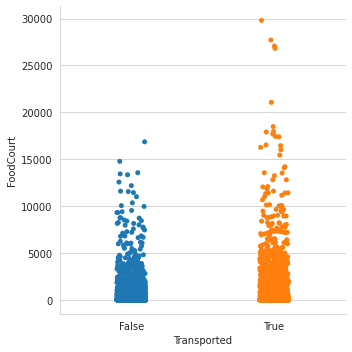

In [29]:
sns.catplot(x='Transported', y='FoodCourt', data=df)

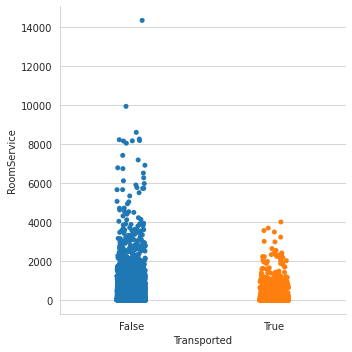

In [30]:
sns.catplot(x='Transported', y='RoomService', data=df)

된사람 안된 사람 나눠 놓기

In [31]:
df_nottransported = df[(df["Transported"] == 0)]
df_nottransported.shape

(4315, 13)

In [32]:
df_transported = df[(df["Transported"] == 1)]
df_transported.shape

(4378, 13)

In [33]:
#null_cat=null.select_dtypes(include='object')
#null_cat.head(3)

### 필요한 카테고리로 묶어주기

In [34]:
# train
df_cat = df.select_dtypes(include='object')
df_cat.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Name
0,0001_01,Europa,False,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,TRAPPIST-1e,False,Willy Santantines


In [35]:
# test
df_cat = test.select_dtypes(include = 'object')
df_cat.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Name
0,0013_01,Earth,True,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,TRAPPIST-1e,False,Brence Harperez


CryoSleep(저온수면) False 또는 True, 목적지, VIP 관계성 

# 스텝 3?

In [36]:
#from sklearn.model_selection import train_test_split
#train_input, test_input, train_target, test_target = train_test_split(
   # df_data, df_target, test_size = 0.2, random_state=42)

#print(train_input.shape, test_input.shape)
#print(train_input)

In [37]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#ss.fit(train_input)
#train_scaled = ss.transform(train_input)
#test_scaled = ss.transform(test_input)

In [38]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(train_scaled, train_target)
#print(lr.score(train_scaled, train_target))
#print(lr.score(test_scaled, test_target))